In [1]:
# Import
import json
import numpy as np
import matplotlib.pyplot as plt
import os.path as osp

from collections import namedtuple, defaultdict
from typing import List


In [2]:
# Constant
METHODS = {
    'median': {'folder_result': '../results/median',
               'json_file': 'results_general.json'},
    # 'median_cluster': {'folder_result': '../results/median_cluster',
    #            'json_file': 'results_general.json'},
}

In [24]:
class Experiment:
    
    def __init__(self, dataset: str, method: str, experiment_folders: List[str], color: str) -> None:
        """
        
        """
        self.dataset = dataset
        self.method = method
        self.color = color
        
        self.experiments = {name_exp: osp.join(METHODS[method]['folder_result'], dataset, name_exp)
                            for name_exp in experiment_folders}
        self.experiments_data = {}
        
        self._load_json_data()
        
    def _load_json_data(self) -> None:
        """Load the results data from json file"""
        for name_exp, folder_exp in self.experiments.items():
            filename = osp.join(folder_exp, METHODS[self.method]['json_file'])
            with open(filename, 'r') as file:
                data = json.load(file)
            self.experiments_data[name_exp] = data


experiments_median = [
    Experiment('enzymes', 'median', [f'kmeans_{2 + i}to{10 + i}' for i in range(0, 40, 10)], 'tab:blue'),
    Experiment('proteins', 'median', [f'kmeans_{2 + i}to{10 + i}' for i in range(0, 40, 10)], 'tab:orange'),
    Experiment('NCI1', 'median', [f'kmeans_{2 + i}to{10 + i}' for i in range(0, 40, 10)], 'tab:green'),
    Experiment('mutagenicity', 'median', [f'kmeans_{2 + i}to{10 + i}' for i in range(0, 40, 10)], 'tab:red'),
    Experiment('dd', 'median', [f'kmeans_{2 + i}to{10 + i}' for i in range(0, 40, 10)], 'tab:purple'),
]


In [33]:
current_dataset = 'dd'
current_color = 'black'
for experiment in experiments_median:
    print(experiment.dataset)
    if experiment.dataset != current_dataset:
        continue
    
    current_color = experiment.color
    err_per_k = defaultdict(lambda: defaultdict(lambda: list()))
    
    print()
    for e in experiment.experiments_data.keys():
        for key, data in  experiment.experiments_data[e].items():
            if key == 'parameters':
                continue
            # print(key)
            for cls_, values in data.items():
                # print(cls_)
                # err_per_k[cls_] = defaultdict(lambda: list())
                for n_cluster, err in values['best_err_per_k'].items():
                    # print(n_cluster, err)

                    err_per_k[cls_][n_cluster].append(err)
                
# print(err_per_k)
# print(len(err_per_k))
# print(experiments_median[0].experiments_data['kmeans_test_save_centroids'])

enzymes
proteins
NCI1
mutagenicity
dd



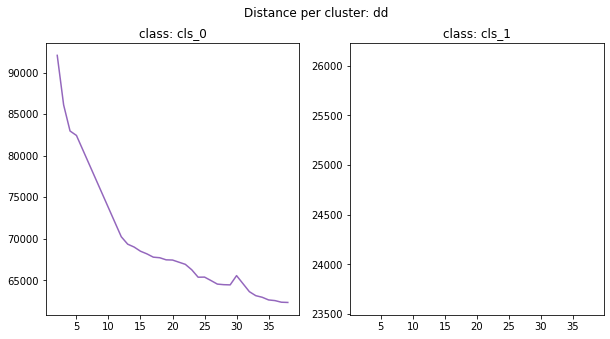

In [34]:
fig, axs = plt.subplots(nrows=1, ncols=len(err_per_k), sharex=True,
                                    figsize=(5*len(err_per_k), 5))

for ax, (key, val) in zip(axs, err_per_k.items()):
    x = []
    y = []
    y_err = []
    for k, err in val.items():
        x.append(int(k))
        y.append(np.mean(err))
        y_err.append(np.std(err))
    
    np_x = np.array(x)
    np_y = np.array(y)
    np_y_err = np.array(y_err)
    
    
    ax.set_title(f'class: {key}')
    ax.errorbar(np.array(x), np.array(y), yerr=np_y_err, color=current_color)

fig.suptitle(f'Distance per cluster: {current_dataset}')
plt.savefig(f'kmeans_{current_dataset}.png')
plt.show()

[(2, 10), (12, 20), (22, 30), (32, 40)]